In [1]:
# For data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import requests

from io import StringIO

In [2]:
url = 'https://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton.csv'

source = requests.get(url).text

poll_data = StringIO(source)

poll_df = pd.read_csv(poll_data)

poll_df.info

<bound method DataFrame.info of                       Pollster  Start Date    End Date  Entry Date/Time (ET)  \
0                Insights West  2016-11-04  2016-11-07  2016-11-08T12:16:30Z   
1                Insights West  2016-11-04  2016-11-07  2016-11-08T12:16:30Z   
2                Insights West  2016-11-04  2016-11-07  2016-11-08T12:16:30Z   
3                Insights West  2016-11-04  2016-11-07  2016-11-08T12:16:30Z   
4                     IBD/TIPP  2016-11-04  2016-11-07  2016-11-08T12:10:06Z   
5             YouGov/Economist  2016-11-04  2016-11-07  2016-11-07T21:25:46Z   
6             YouGov/Economist  2016-11-04  2016-11-07  2016-11-07T21:25:46Z   
7             YouGov/Economist  2016-11-04  2016-11-07  2016-11-07T21:25:46Z   
8             YouGov/Economist  2016-11-04  2016-11-07  2016-11-07T21:25:46Z   
9     Lucid/The Times-Picayune  2016-11-04  2016-11-06  2016-11-07T15:43:26Z   
10            Bloomberg/Selzer  2016-11-04  2016-11-06  2016-11-07T12:18:47Z   
11      

In [4]:
#https://cg-519a459a-0ea3-42c2-b7bc-fa1143481f74.s3-us-gov-west-1.amazonaws.com/bulk-downloads/index.html
donor_df = pd.read_csv('Election_Donor_Data.csv')

/Users/Brenda-Liu-Life/Applications/Anaconda/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [6]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [8]:
#Get the average donation amount

donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 174.80          1
 7.27            1
 1219.00         1
 1884.88         1
 162.25          1
 218.31          1
 78.62           1
 203.16          1
 53.11           1
 499.66          1
 19.53           1
 188.60          1
 47.10           1
 19.85           1
 28.83           1
 202.59          1
-5500.00         1
 9.25            1
 202.66          1
 1205.00         1
 80.73           1
 115.07     

In [9]:
donor_mean = donor_df['contb_receipt_amt'].mean()

298.2351500951093

In [10]:
donor_std = donor_df['contb_receipt_amt'].std()

3749.666723269043

In [29]:
# Get the mean donation
don_mean = donor_df['contb_receipt_amt'].mean()

# Get the std of the donation
don_std = donor_df['contb_receipt_amt'].std()


#NEW format
url = 'https://pyformat.info'
print ("The average donation was %.2f with a std of %.2f" % (don_mean,don_std) ) 

#print ("The average donation was '{:f}'.format(don_mean) with a std of '{:f}'.format(don_std)" )

The average donation was 298.24 with a std of 3749.67


In [31]:
top_donor = donor_df['contb_receipt_amt'].copy()

In [33]:
top_donor

0           250.0
1            50.0
2           250.0
3           250.0
4           300.0
5           500.0
6           250.0
7           250.0
8           250.0
9           250.0
10          250.0
11          500.0
12          250.0
13          250.0
14          250.0
15          300.0
16          500.0
17         1000.0
18          250.0
19          300.0
20          500.0
21          250.0
22         2500.0
23         2500.0
24          150.0
25          200.0
26          100.0
27          250.0
28          500.0
29          250.0
            ...  
1001701    2500.0
1001702    2500.0
1001703   -2500.0
1001704   -2500.0
1001705    1000.0
1001706    2500.0
1001707   -2500.0
1001708    2500.0
1001709   -2500.0
1001710   -2500.0
1001711    1000.0
1001712    2500.0
1001713    2500.0
1001714     250.0
1001715     250.0
1001716    1000.0
1001717     100.0
1001718    2500.0
1001719    2500.0
1001720     100.0
1001721     250.0
1001722     100.0
1001723     100.0
1001724     500.0
1001725   

In [34]:
top_donor.sort_values()

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
33821       -5414.31
908565      -5115.00
456649      -5000.00
574657      -5000.00
30513       -5000.00
562267      -5000.00
30584       -5000.00
86268       -5000.00
708920      -5000.00
665887      -5000.00
708899      -5000.00
708929      -5000.00
21172       -5000.00
21168       -5000.00
21167       -5000.00
262328      -5000.00
946875      -5000.00
7361        -5000.00
416403      -5000.00
21164       -5000.00
707945      -5000.00
615101      -5000.00
7973        -5000.00
54430       -5000.00
54434       -5000.00
             ...    
708022      10000.00
708898      10000.00
710177      10000.00
876244      10000.00
709608      10000.00
708919      10000.00
709739      10000.00
91145       10000.00
708138      10000.00
993178      10000.00
709813      10000.00
710730      10000.00
708928      10000.00
709268      10000.00
99829       10000.00
90076       10000.00
709859      1

In [36]:
#Get rid of all the donor that is less than 0
top_donor = top_donor[top_donor>0]

top_donor.sort_values()

335573          0.01
335407          0.01
335352          0.01
324596          0.01
329896          0.01
318560          0.01
335100          0.01
318670          0.01
329984          0.01
335087          0.01
335033          0.01
330220          0.01
330222          0.01
324283          0.01
324170          0.01
334913          0.01
334899          0.01
323823          0.01
324778          0.01
323822          0.01
324838          0.01
324876          0.01
336020          0.01
317634          0.01
325344          0.01
335767          0.01
317753          0.01
325153          0.01
325151          0.01
350626          0.01
             ...    
710177      10000.00
709608      10000.00
99829       10000.00
711167      10000.00
993178      10000.00
710198      10000.00
708928      10000.00
708022      10000.00
709739      10000.00
709859      10000.00
709813      10000.00
708919      10000.00
708138      10000.00
876244      10000.00
91145       10000.00
708898      10000.00
710730      1

In [39]:
top_donor.value_counts()

100.00     178188
50.00      137584
25.00      110345
250.00      91182
500.00      57984
2500.00     49005
35.00       37237
1000.00     36494
10.00       33986
200.00      27813
20.00       17565
15.00       16163
150.00      14600
75.00       13647
201.20      11718
30.00       11381
300.00      11204
20.12        9897
5.00         9024
40.00        5007
2000.00      4128
55.00        3760
1500.00      3705
3.00         3383
60.00        3084
400.00       3066
110.00       2554
125.00       2520
19.00        2474
112.00       2457
            ...  
41.04           1
77.13           1
114.43          1
31.24           1
97.65           1
13.66           1
157.12          1
73.12           1
499.66          1
188.65          1
1197.50         1
122.32          1
144.88          1
77.88           1
19.53           1
188.60          1
47.10           1
19.85           1
28.83           1
202.59          1
9.25            1
202.66          1
1205.00         1
80.73           1
115.07    

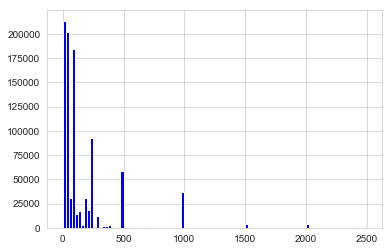

In [44]:
com_don = top_donor[top_donor <2500]

com_don.hist(bins = 100,color ='blue')

A quick question we could verify is if donations are usually made in round number amounts? (e.g. 10,20,50,100,500 etc.) We can quickly visualize this by making a histogram and checking for peaks at those values. Let's go ahead and do this for the most common amounts, up to 2500 dollars.

In [45]:
candidates = donor_df.cand_nm.unique()

candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [50]:
# Dictionary of party affiliation
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

# Now map the party with candidate
donor_df['Party'] = donor_df.cand_nm.map(party_map)


In [51]:
''''for i in range(0,len(donor_df)):
    if donor_df['cand_nm'][i] == 'Obama,Barack':
        donor_df['Party'][i] = 'Democrat'
    else:
        donor_df['Party'][i] = 'Republican'
        ''''

SyntaxError: EOL while scanning string literal (<ipython-input-51-f10640918416>, line 6)

In [52]:
donor_df

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
5,C00410118,P20002978,"Bachmann, Michelle","BECKMAN, JAMES",SPRINGDALE,AR,7.27647e+08,NONE,RETIRED,500.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
6,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
7,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
8,C00410118,P20002978,"Bachmann, Michelle","COLLINS, SARAH",MESA,AZ,8.52107e+08,ST. JOSEPH HOSPITAL,RN,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
9,C00410118,P20002978,"Bachmann, Michelle","COLEMAN, RONALD",TUCSON,AZ,8.57499e+08,RAYTHEON,ELECTRICAL ENGINEER,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [53]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [61]:
d2=donor_df.groupby('cand_nm')['contb_receipt_amt'].mean()

In [62]:
d1= donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

In [66]:
d4=donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

In [64]:
#statistically?
d3= (d1*d2)

In [74]:
d3.shape

(13,)

In [76]:
# Start by setting the groupby as an object


#i counter
i=0

#make a for loop, For every donations in the d4 list
for don in d4:
    print("The candidate %s raise %.0f dollars" %(d4.index[i],don))
#Print the new line
    print("\n")
#write the sentance again.
    i +=1

The candidate Bachmann, Michelle raise 2677435 dollars


The candidate Cain, Herman raise 7047265 dollars


The candidate Gingrich, Newt raise 12011832 dollars


The candidate Huntsman, Jon raise 3204350 dollars


The candidate Johnson, Gary Earl raise 566962 dollars


The candidate McCotter, Thaddeus G raise 37030 dollars


The candidate Obama, Barack raise 133502591 dollars


The candidate Paul, Ron raise 20722567 dollars


The candidate Pawlenty, Timothy raise 4255054 dollars


The candidate Perry, Rick raise 18411512 dollars


The candidate Roemer, Charles E. 'Buddy' III raise 367458 dollars


The candidate Romney, Mitt raise 85219249 dollars


The candidate Santorum, Rick raise 10728090 dollars




In [78]:
d5 = donor_df.groupby('Party')['contb_receipt_amt'].sum()

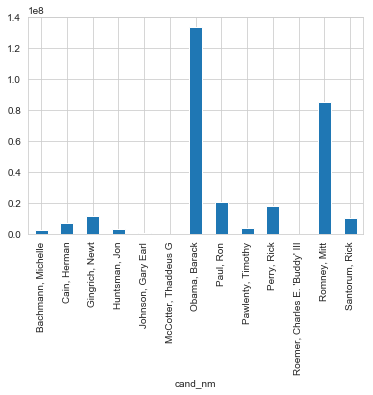

In [77]:
d4.plot(kind='bar')

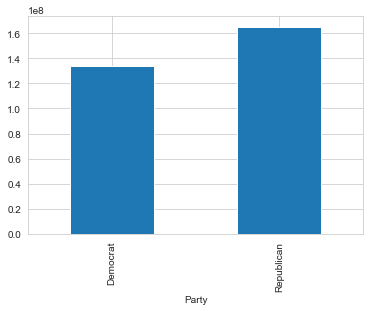

In [82]:
d5.plot(kind='bar')

Finally to start closing out the project, let's look at donations and who they came from (as far as occupation is concerned). We will start by grabing the occupation information from the dono_df DataFrame and then using pivot_table to make the index defined by the various occupations and then have the columns defined by the Party (Republican or Democrat). FInally we'll also pass an aggregation function in the pivot table, in this case a simple sum function will add up all the comntributions by anyone with the same profession.

In [86]:
occupation_df = donor_df.pivot_table('contb_receipt_amt',
                                    index = 'contbr_occupation',
                                    columns = 'Party',
                                    aggfunc = 'sum')

In [88]:
occupation_df.head()

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [90]:
occupation_df.shape

(45073, 2)

In [91]:
occupation_df.describe()

Party,Democrat,Republican
count,2.916800e+04,2.108700e+04
mean,4.348092e+03,7.952837e+03
std,1.720543e+05,2.309139e+05
min,-5.000000e+03,-2.500000e+03
25%,1.250000e+02,2.000000e+02
50%,2.600000e+02,4.466900e+02
75%,7.442725e+02,1.400000e+03
max,2.527051e+07,2.290594e+07


In [92]:
# Set a cut off point at 1 milllion dollars of sum contributions
occupation_df = occupation_df[occupation_df.sum(1)>1000000]

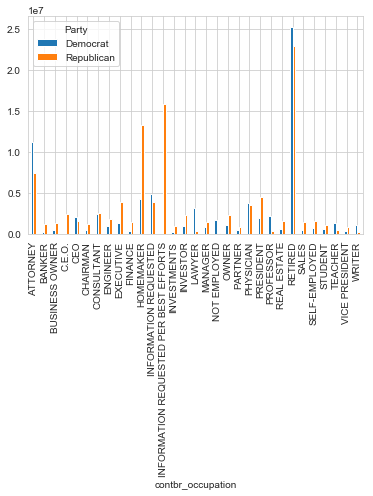

In [94]:
occupation_df.plot(kind = 'bar')

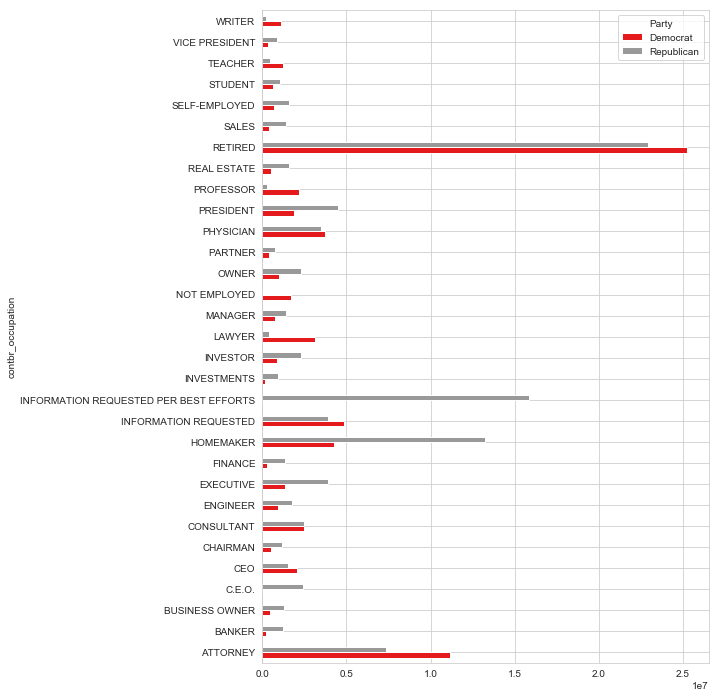

In [105]:
occupation_df.plot(kind = 'barH', figsize = (8,12), cmap = 'Set1')

In [107]:
#Drop occupation that shows NaN value
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],
                   axis=0,inplace=True)

In [108]:
#Setting the index of occurance of the same.
occupation_df.loc['CEO']=occupation_df.loc['CEO'] +occupation_df.loc['C.E.O.']
# Drop C.E.O.
occupation_df.drop('C.E.O.',inplace=True)

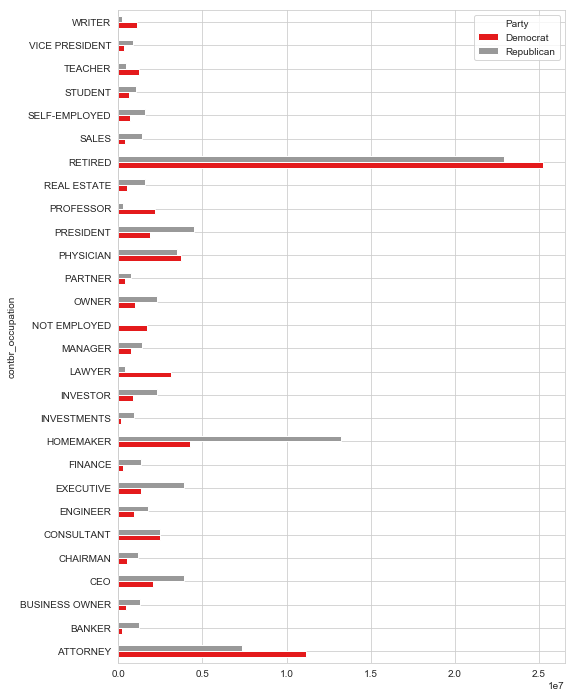

In [109]:
occupation_df.plot(kind = 'barH', figsize = (8,12), cmap = 'Set1')

There's still so much to discover in these rich datasets! Come up with your own political questions you want answered! Or just play around with different methods of visualizing the data!

For more on general data analysis of politics, I highly suggest the 538 website!

Again, great job on getting through the course this far! Go ahead and search the web for more data to discover!